In [1]:
cd drive/My Drive/Colab Notebooks

/content/drive/My Drive/Colab Notebooks


In [2]:
!ls

radam_submission.csv   test_df.csv.zip	 week7_keras_assignment_이지용.ipynb
sample_submission.csv  train_df.csv	 week7_pytorch_assignment_이지용.ipynb
test_df.csv	       train_df.csv.zip


In [0]:
import pandas as pd
import numpy as np

In [21]:
!pip install -q tensorflow-gpu==2.0.0-rc1

     |████████████████████████████████| 380.5MB 47kB/s 
ERROR: Operation cancelled by user


In [4]:
!pip install keras-rectified-adam

  Created wheel for keras-rectified-adam: filename=keras_rectified_adam-0.17.0-cp36-none-any.whl size=14781 sha256=afadc0b613245ac01a68406e6596040f4014135f600908707c67b0755a4834ed
  Stored in directory: /root/.cache/pip/wheels/7b/01/27/3a934e1a5644f5b93c720422a6ef97034ea78a21ba71cfb549
Successfully built keras-rectified-adam


In [0]:
sample_submission = pd.read_csv("sample_submission.csv")
train = pd.read_csv("train_df.csv")
test = pd.read_csv("test_df.csv")

In [6]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
test.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,57808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [0]:
X_test = test.iloc[:,1:].values

In [0]:
X = X / 255
X_test = X_test / 255

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2018)

In [35]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


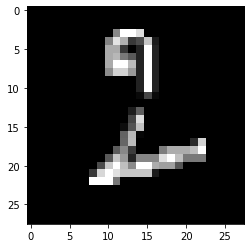

In [36]:
import matplotlib.pyplot as plt
idx = 624
plt.imshow(x_train[idx].reshape(28, 28), cmap="gray")

Agumentation 하려 했으나 실패


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        fill_mode='nearest')

In [0]:
datagen.fit(x_train.reshape(x_train.shape[0], 28, 28, 1))

In [0]:
import tensorflow as tf
num_classes = 10

# https://www.tensorflow.org/api_docs/python/tf/
# https://developers.google.com/machine-learning/glossary?hl=ko
# 케라스에서는 층(layer)을 조합하여 모델(model)을 만듭니다. 모델은 (일반적으로) 층의 그래프입니다. 가장 흔한 모델 구조는 층을 차례대로 쌓은 tf.keras.Sequential 모델입니다.
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, kernel_initializer='he_normal', input_shape=(784, )),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),                                                 # 오버피팅을 방지하기 위해 드랍
  tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation="selu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, kernel_initializer='he_normal', activation="selu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(64, kernel_initializer='he_normal', activation="selu"),
  tf.keras.layers.Dense(num_classes, activation="softmax"),                     # 출력층
])

In [0]:
class myAccuracy(tf.keras.metrics.Accuracy):
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.argmax(y_true,1)
        y_pred = tf.argmax(y_pred,1)
        return super(myAccuracy,self).update_state(y_true,y_pred,sample_weight)

In [150]:
from keras_radam.training import RAdamOptimizer
model.compile(optimizer=RAdamOptimizer(learning_rate=1e-3), loss="sparse_categorical_crossentropy", metrics=[myAccuracy()])
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_27 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_27 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_28 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_28 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 128)              

In [151]:
history = model.fit(x_train, y_train, batch_size=512, epochs=20, validation_data=[x_val, y_val])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 3s 91us/sample - loss: 1.5206 - accuracy: 0.1138 - val_loss: 0.3676 - val_accuracy: 0.1111
Epoch 2/20
33600/33600 [==============================] - 1s 41us/sample - loss: 0.3367 - accuracy: 0.0978 - val_loss: 0.2010 - val_accuracy: 0.1025
Epoch 3/20
33600/33600 [==============================] - 1s 39us/sample - loss: 0.2233 - accuracy: 0.0986 - val_loss: 0.1536 - val_accuracy: 0.0995
Epoch 4/20
33600/33600 [==============================] - 1s 39us/sample - loss: 0.1750 - accuracy: 0.0984 - val_loss: 0.1315 - val_accuracy: 0.1002
Epoch 5/20
33600/33600 [==============================] - 1s 40us/sample - loss: 0.1487 - accuracy: 0.0987 - val_loss: 0.1164 - val_accuracy: 0.1005
Epoch 6/20
33600/33600 [==============================] - 1s 41us/sample - loss: 0.1280 - accuracy: 0.0989 - val_loss: 0.1090 - val_accuracy: 0.0992
Epoch 7/20
33600/33600 [==============================] -

In [0]:
predictions = model.predict_classes(X_test)

In [154]:
predictions

array([8, 0, 5, ..., 3, 4, 1])

In [157]:
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [158]:
sample_submission["Category"] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("radam_submission.csv", index=False)

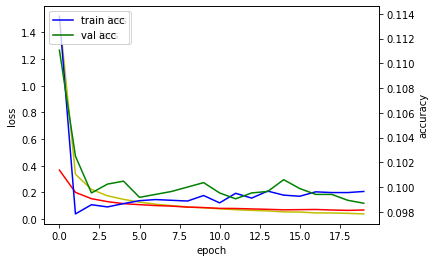

In [160]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

번외, cnn 실험  
https://www.kaggle.com/adityaecdrid/mnist-with-keras-for-beginners-99457

In [0]:
import tensorflow as tf
num_classes = 10

# https://www.tensorflow.org/api_docs/python/tf/
# https://developers.google.com/machine-learning/glossary?hl=ko
# 케라스에서는 층(layer)을 조합하여 모델(model)을 만듭니다. 모델은 (일반적으로) 층의 그래프입니다. 가장 흔한 모델 구조는 층을 차례대로 쌓은 tf.keras.Sequential 모델입니다.
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',kernel_initializer='he_normal',input_shape=(28,28,1)),
  tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',kernel_initializer='he_normal'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.2),                                                 # 오버피팅을 방지하기 위해 드랍
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',kernel_initializer='he_normal'),
  tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',kernel_initializer='he_normal'),
  tf.keras.layers.MaxPool2D((2,2)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu',kernel_initializer='he_normal'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation="selu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation="softmax")                     # 출력층
])

In [0]:
model.compile(optimizer=RAdamOptimizer(), loss="sparse_categorical_crossentropy", metrics=[myAccuracy()])

In [0]:
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

In [80]:
# batch_size : Number of samples per gradient update

history = model.fit(X_train, y_train, batch_size=200, epochs=50)

Train on 33600 samples
Epoch 1/50
33600/33600 [==============================] - 11s 320us/sample - loss: 1.1431 - accuracy: 0.0959
Epoch 2/50
33600/33600 [==============================] - 6s 166us/sample - loss: 0.1680 - accuracy: 0.0993
Epoch 3/50
33600/33600 [==============================] - 5s 164us/sample - loss: 0.0886 - accuracy: 0.0996
Epoch 4/50
33600/33600 [==============================] - 5s 158us/sample - loss: 0.0592 - accuracy: 0.0991
Epoch 5/50
33600/33600 [==============================] - 5s 160us/sample - loss: 0.0459 - accuracy: 0.0997
Epoch 6/50
33600/33600 [==============================] - 5s 159us/sample - loss: 0.0367 - accuracy: 0.0993
Epoch 7/50
33600/33600 [==============================] - 5s 158us/sample - loss: 0.0329 - accuracy: 0.0995
Epoch 8/50
33600/33600 [==============================] - 5s 159us/sample - loss: 0.0269 - accuracy: 0.0995
Epoch 9/50
33600/33600 [==============================] - 5s 156us/sample - loss: 0.0245 - accuracy: 0.0996
Epoc

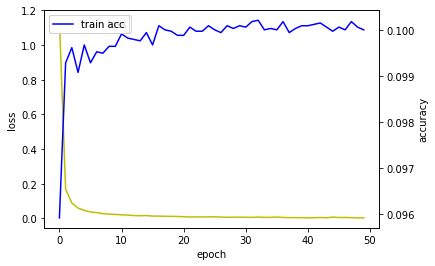

In [83]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(history.history['loss'], 'y', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [0]:
predictions = model.predict_classes(X_test)

In [85]:
predictions

array([8, 0, 5, ..., 3, 4, 1])

In [86]:
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [87]:
sample_submission["Category"] = pd.Series(predictions)
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("radam_submission.csv", index=False)